In [28]:
from py_vollib_vectorized import vectorized_implied_volatility
from log_normal_mix import LogNormalMixture
import matplotlib.pyplot as plt
from toggle import hide_toggle
import numpy as np


In [29]:
# @hidden

lambdas = np.array([0.26548851, 0.09695673, 0.63755476])
etas = np.array([0.21787635, 0.1069443, 0.17158329])
alpha = 0.14734888
strikes = np.arange(80, 121)
s0 = 100.0
mu = 0.05
tau = 2.0
flag = "c"

quotes_a = LogNormalMixture.npv(
    strikes=np.arange(80, 121),
    alpha=0.0,
    tau=tau,
    mu=mu,
    s0=s0,
    lambdas=np.array([0.6, 0.4]),
    etas=np.array([0.35, 0.1]),
)
quotes_b = LogNormalMixture.npv(
    strikes=np.arange(80, 121),
    alpha=-0.2,
    tau=tau,
    mu=mu,
    s0=s0,
    lambdas=np.array([0.6, 0.4]),
    etas=np.array([0.1099, 0.3553]),
)
quotes_c = LogNormalMixture.npv(
    strikes=np.arange(80, 121),
    alpha=-0.4,
    tau=tau,
    mu=mu,
    s0=s0,
    lambdas=np.array([0.6, 0.4]),
    etas=np.array([0.09809, 0.2979]),
)

iv_a_0 = vectorized_implied_volatility(
    quotes_a,
    s0,
    strikes,
    tau,
    mu,
    flag,
    q=0.0,
    model="black_scholes_merton",
    return_as="numpy",
)
iv_b_0 = vectorized_implied_volatility(
    quotes_b,
    s0,
    strikes,
    tau,
    mu,
    flag,
    q=0.0,
    model="black_scholes_merton",
    return_as="numpy",
)
iv_c_0 = vectorized_implied_volatility(
    quotes_c,
    s0,
    strikes,
    tau,
    mu,
    flag,
    q=0.0,
    model="black_scholes_merton",
    return_as="numpy",
)

quotes_a = LogNormalMixture.npv(
    strikes=np.arange(80, 121),
    alpha=-0.0,
    tau=tau,
    mu=mu,
    s0=s0,
    lambdas=np.array([0.6, 0.4]),
    etas=np.array([0.35, 0.1]),
)
quotes_b = LogNormalMixture.npv(
    strikes=np.arange(80, 121),
    alpha=-0.2,
    tau=tau,
    mu=mu,
    s0=s0,
    lambdas=np.array([0.6, 0.4]),
    etas=np.array([0.35, 0.1]),
)
quotes_c = LogNormalMixture.npv(
    strikes=np.arange(80, 121),
    alpha=-0.4,
    tau=tau,
    mu=mu,
    s0=s0,
    lambdas=np.array([0.6, 0.4]),
    etas=np.array([0.35, 0.1]),
)

iv_a_1 = vectorized_implied_volatility(
    quotes_a,
    s0,
    strikes,
    tau,
    mu,
    flag,
    q=0.0,
    model="black_scholes_merton",
    return_as="numpy",
)
iv_b_1 = vectorized_implied_volatility(
    quotes_b,
    s0,
    strikes,
    tau,
    mu,
    flag,
    q=0.0,
    model="black_scholes_merton",
    return_as="numpy",
)
iv_c_1 = vectorized_implied_volatility(
    quotes_c,
    s0,
    strikes,
    tau,
    mu,
    flag,
    q=0.0,
    model="black_scholes_merton",
    return_as="numpy",
)

hide_toggle()


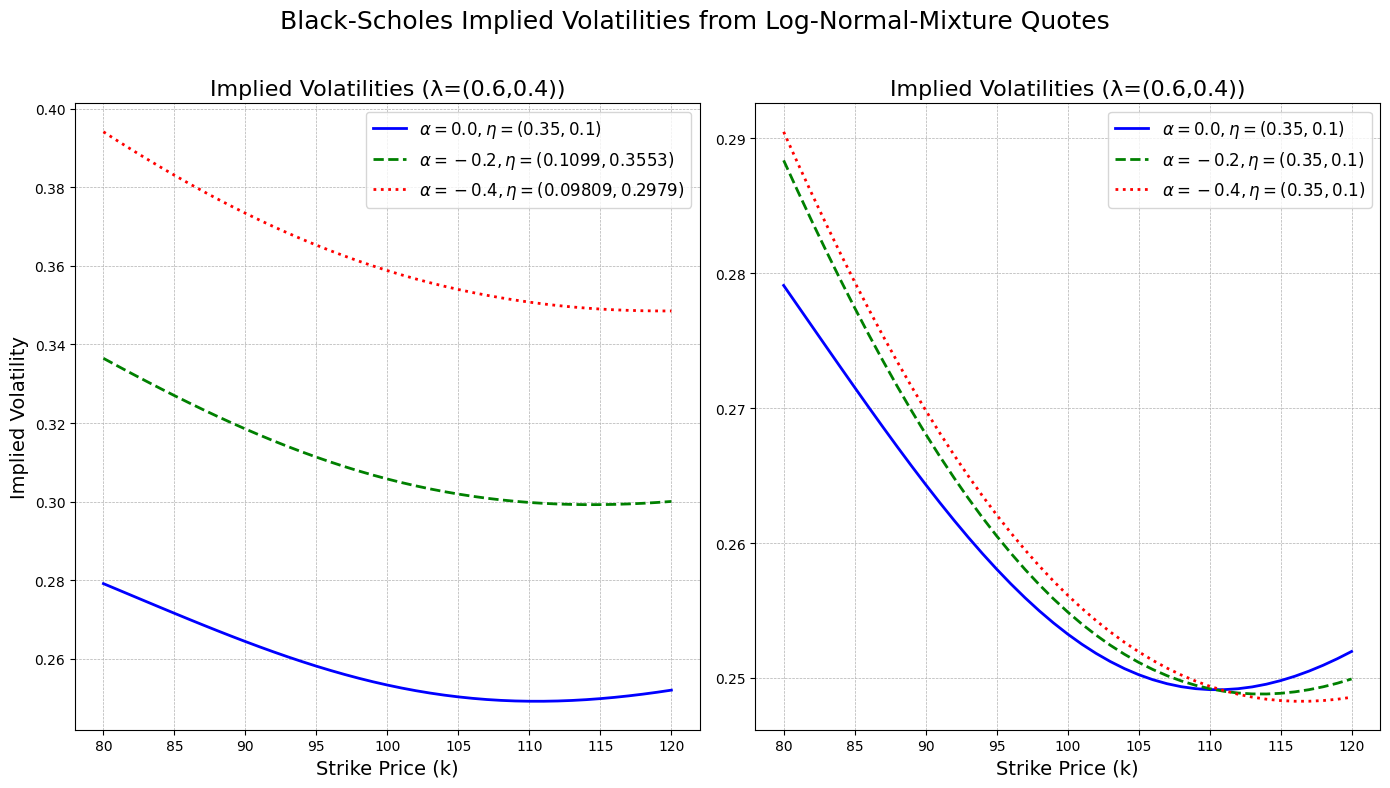

In [26]:
plt.figure(figsize=(14, 8))

# sp1
plt.subplot(121)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.plot(strikes, iv_a_1, label=r"$\alpha=0.0, \eta=(0.35, 0.1)$", c="b", linewidth=2)
plt.plot(strikes, iv_b_1, label=r"$\alpha=-0.2, \eta=(0.1099, 0.3553)$", c="g", linestyle="--", linewidth=2)
plt.plot(strikes, iv_c_1, label=r"$\alpha=-0.4, \eta=(0.09809, 0.2979)$", c="r", linestyle=":", linewidth=2)
plt.legend(fontsize=12)
plt.title("Implied Volatilities (λ=(0.6,0.4))", fontsize=16)
plt.xlabel("Strike Price (k)", fontsize=14)
plt.ylabel("Implied Volatility", fontsize=14)

# sp2
plt.subplot(122)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.plot(strikes, iv_a_0, label=r"$\alpha=0.0, \eta=(0.35, 0.1)$", c="b", linewidth=2)
plt.plot(strikes, iv_b_0, label=r"$\alpha=-0.2, \eta=(0.35, 0.1)$", c="g", linestyle="--", linewidth=2)
plt.plot(strikes, iv_c_0, label=r"$\alpha=-0.4, \eta=(0.35, 0.1)$", c="r", linestyle=":", linewidth=2)
plt.legend(fontsize=12)
plt.title("Implied Volatilities (λ=(0.6,0.4))", fontsize=16)
plt.xlabel("Strike Price (k)", fontsize=14)

plt.suptitle("Black-Scholes Implied Volatilities from Log-Normal-Mixture Quotes", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()
